# Assignment Day 12 :
1. Gunakan data iris.csv
2. Jawablah poin-poin assignment yang tertera dibawah

In [1]:
import pandas as pd
import numpy as np
import scipy
import warnings
warnings.filterwarnings("ignore")

# Plotting Usage
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("1700298484729-iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

## 1. Assignment EDA (point 15)
Visualisasi di tiap plot numerik, dan tulis insight yang didapat **(point 15)**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def check_plot(df, variable):
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    # plot Q-Q
    plt.subplot(1, 3, 2)
    scipy.stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

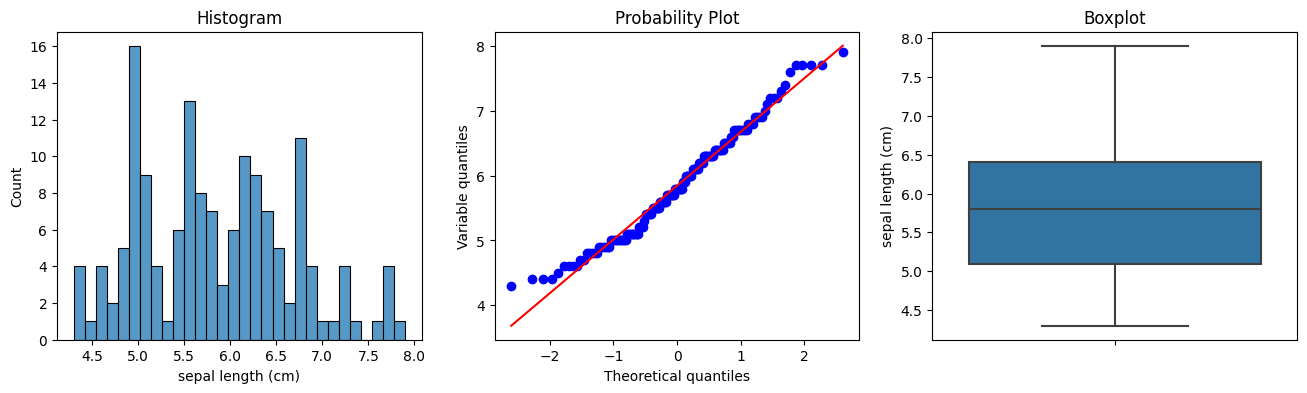

In [5]:
check_plot(df,'sepal length (cm)')

Sepal length's distribution: Normally distributed

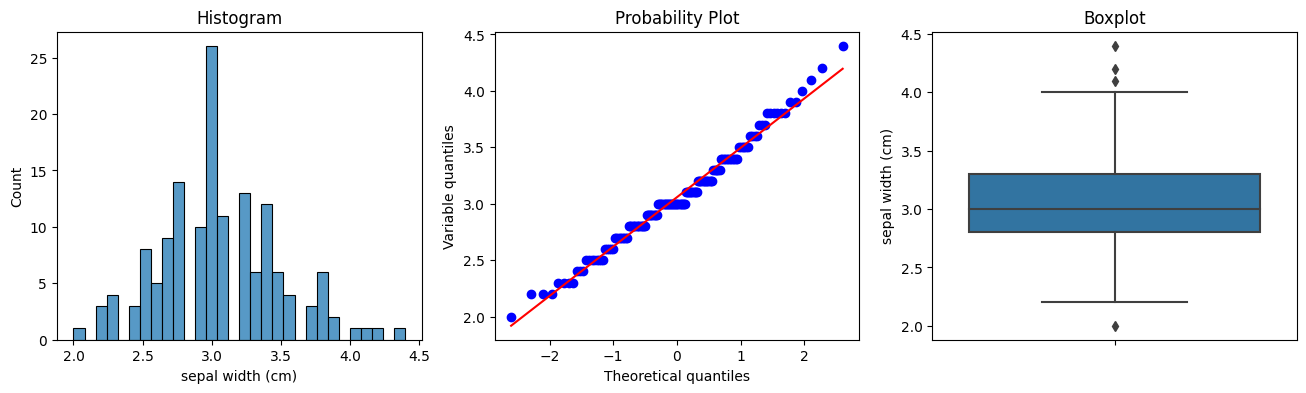

In [6]:
check_plot(df,'sepal width (cm)')

Sepal width's distribution: Normally distributed. Terdapat sedikit outlier, namun mungkin saja disebabkan karena variasi genetik dan mutasi.

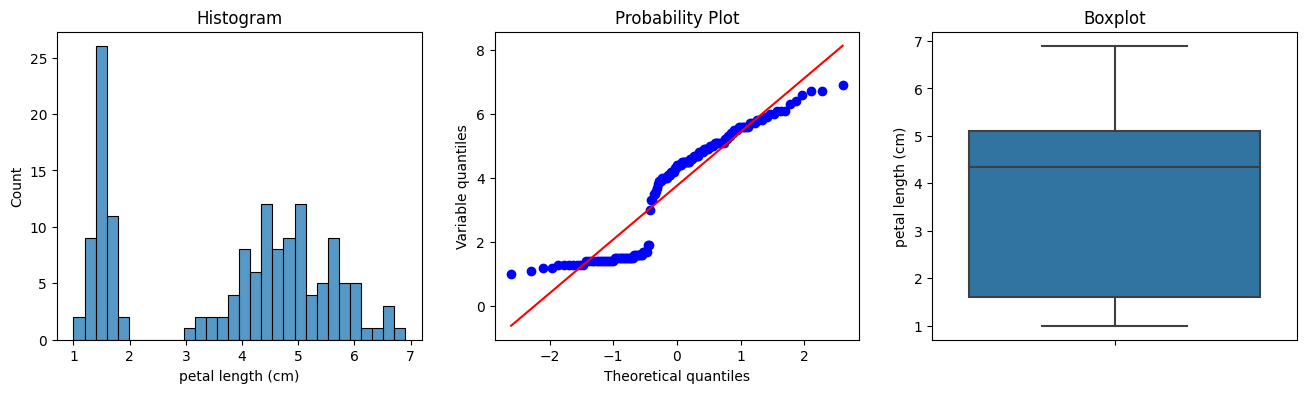

In [7]:
check_plot(df,'petal length (cm)')

Petal width's distribution: A bit positively skewed

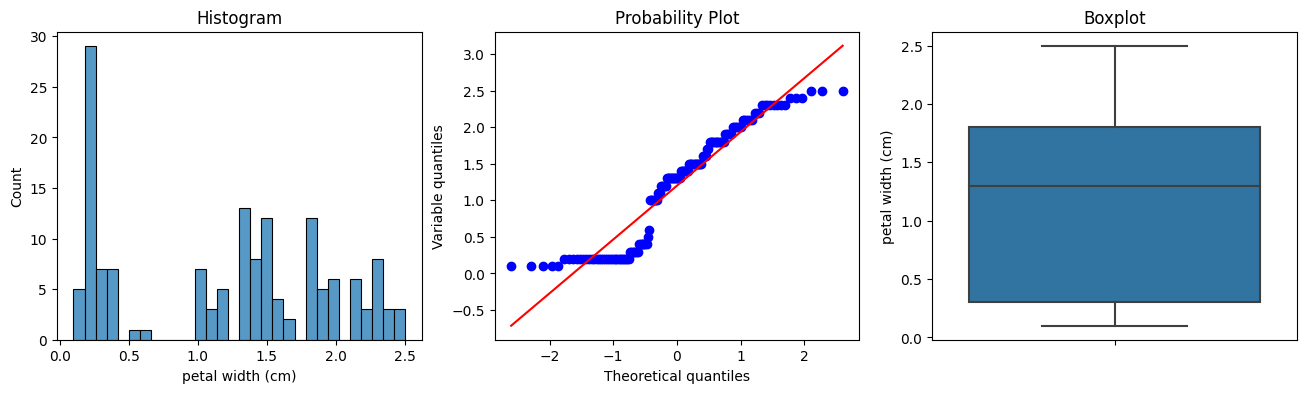

In [8]:
check_plot(df,'petal width (cm)')

Petal width's distribution: A bit positively skewed

### Interpretasi Insight

Hal yang menarik adalah bahwa lebar dan panjang petal sama-sama positive skewed. Ada 2 poin yang saya tangkap disini:

1. Panjang petal berkorelasi positif dengan lebar petal.
2. Adanya gap pada distribusi ukuran petal memungkinkan bahwa ukuran petal berkorelasi tinggi terhadap target klasifikasi.

Kedua poin diatas akan saya coba buktikan nanti menggunakan correlation matrix. Namun sebelumnya saya akan coba melihat value count pada target untuk mengetahui encoding apa yang tepat digunakan.

In [9]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Karena terdapat 3 kelas dengan jumlah yang sama, maka sepertinya one-hot encoding aman untuk digunakan karena tidak adanya bias kejomplangan populasi.

In [10]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Fit and transform the 'species' column
encoded = ohe.fit_transform(df[['species']])
# Convert the encoded result to a DataFrame
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(input_features=['species']))
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0


Sekarang akan saya coba buat correlation matrix nya.

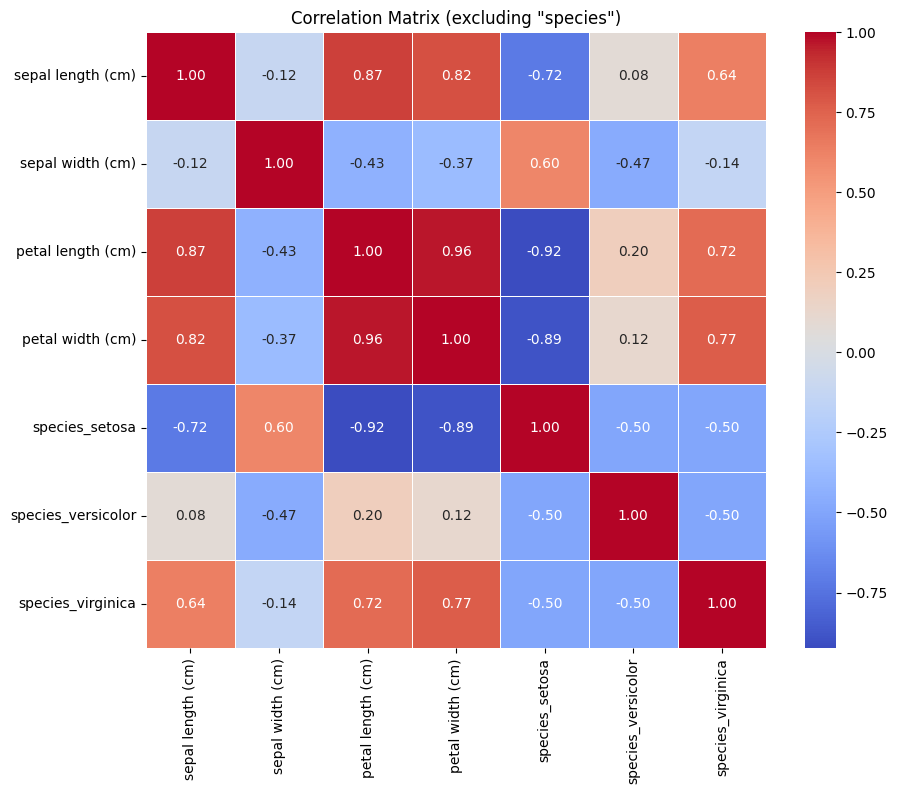

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the encoded species columns
# Drop the original 'species' column before creating the correlation matrix
df_no_species = df.drop('species', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_no_species.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (excluding "species")')
plt.show()

Seperti yang diduga:
1. Terlihat bahwa korelasi antara petal length dengan petal width adalah 0.96. Ini berarti bahwa bunga yang memiliki petal length besar cenderung memiliki petal width yang besar juga. Dan sebaliknya
2. Terlihat juga bahwa korelasi antara petal length dan petal width dengan setosa adalah -0.92 dan -0.89. Sedangkan korelasi petal length dan petal width dengan virginica adalah 0.72 dan 0.77. Ini berarti bahwa bunga setosa cenderung memiliki ukuran petal yang kecil sedangkan virginica cenderung memiliki ukuran petal yang besar. Yang akan menjadi masalah disini adalah bungan versicolor, karena bunga tersebut sama sekali tidak memiliki korelasi yang kuat baik dengan ukuran petal maupun sepal. Oleh karena itu sangat memungkinkan bahwa bias yang akan kita temui saat melakukan cluster nanti berasal dari populasi bunga versicolor.

## 2. Assignment Feature Engineering (Poin 15)
1. Drop duplikat
2. Outlier Handling (Silahkan bisa dilakukan bisa tidak, cantumkan alasan saudara jika menggunakan teknik outlier handling)
3. Feature Scalling (Pilih salah satu : MinMaxScaller atau Standar Scaller)

In [12]:
#Tambahkan cell jika perlu

### 1. Drop Duplikat

In [13]:
df=df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length (cm)   149 non-null    float64
 1   sepal width (cm)    149 non-null    float64
 2   petal length (cm)   149 non-null    float64
 3   petal width (cm)    149 non-null    float64
 4   species             149 non-null    object 
 5   species_setosa      149 non-null    float64
 6   species_versicolor  149 non-null    float64
 7   species_virginica   149 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.5+ KB
None


### 2. Outlier Handling

Tidak perlu dilakukan outlier handling karena hanya ada sedikit outlier pada sepal width, yang mana bisa saja disebabkan karena mutasi genetik yang eksklusif terdapat dalam satu jenis spesies sehingga daripada dihilangkan, bisa saja kita keep dan mungkin itu juga menjadi penentu spesies yang reliable.

Code line dibawah menunjukkan bahwa seluruh outlier atas berasal dari setosa sedangkan seluruh outlier bawah berasal dari versicolor. Jumlah datanya pun tidak banyak sehingga kalaupun ternyata kenyataan aktualnya adalah tidak seluruh outlier merupakan setosa atau versicolor, tidak akan terlalu berdampak kedalam akurasi model.

In [14]:
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [15]:
Population_upper_limit, Population_lower_limit = find_outlier_boundary(df, 'sepal width (cm)')
Population_upper_limit, Population_lower_limit

(4.05, 2.05)

In [16]:
print(df[(df['sepal width (cm)'] < 2.05) | (df['sepal width (cm)'] > 4.05)])

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

       species  species_setosa  species_versicolor  species_virginica  
15      setosa             1.0                 0.0                0.0  
32      setosa             1.0                 0.0                0.0  
33      setosa             1.0                 0.0                0.0  
60  versicolor             0.0                 1.0                0.0  


### 3. Feature Scaling

Karena ada beberapa fitur yang skewed, maka akan digunakan min-max scaler.

Note: pada versi project kali ini kita akan menambahkan sepal shape dan petal shape yang merupakan rasio dari panjang dan lebal. Di akhir project, accuracy akan dibandingkan dengan accuracy dari project original tanpa menggunakan fitur shape.

In [17]:
from sklearn.preprocessing import MinMaxScaler

# add shape and choose MinMaxScaler because our data is skewed a bit
scaler=MinMaxScaler()
df['sepal shape']=df['sepal length (cm)']/df['sepal width (cm)']
df['petal shape']=df['petal length (cm)']/df['petal width (cm)']
df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','sepal shape','petal shape']]=scaler.fit_transform(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','sepal shape','petal shape']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_setosa,species_versicolor,species_virginica,sepal shape,petal shape
0,0.222222,0.625000,0.067797,0.041667,setosa,1.0,0.0,0.0,0.111531,0.378641
1,0.166667,0.416667,0.067797,0.041667,setosa,1.0,0.0,0.0,0.215586,0.378641
2,0.111111,0.500000,0.050847,0.041667,setosa,1.0,0.0,0.0,0.118386,0.339806
3,0.083333,0.458333,0.084746,0.041667,setosa,1.0,0.0,0.0,0.127317,0.417476
4,0.194444,0.666667,0.067797,0.041667,setosa,1.0,0.0,0.0,0.071222,0.378641


## 3. Assignment K-Means (Point 25)
1. Elbow Method **(point 10)**
2. Via Score Plot **(point 10)**
3. Evaluasi model **(Point 5)**


### 1. Elbow Method

Kita akan coba melihat kmeans optimal menggunakan elbow method.

Text(0, 0.5, 'Intertia / WSS')

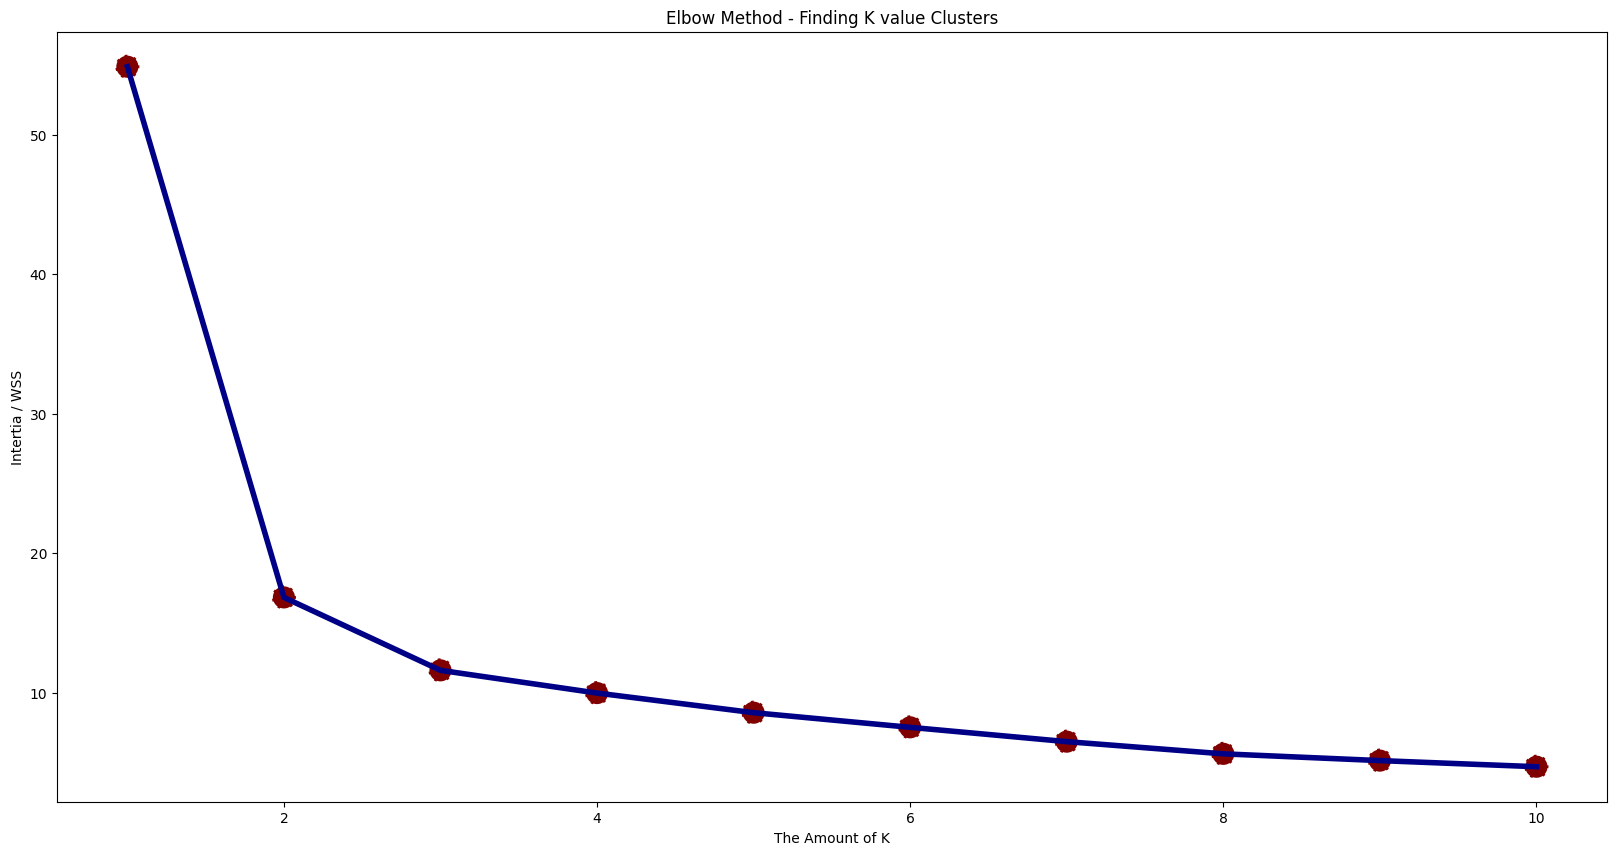

In [18]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','sepal shape','petal shape']].values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Elbow Method - Finding K value Clusters')
plt.xlabel('The Amount of K')
plt.ylabel('Intertia / WSS')

k=3 terlihat sangat menjanjikan karena ia berada tepat setelah turunan tajam dari k=2 dan sebelum k mencapai titik steady mulai dari k=4. Ditambah lagi kita juga sudah tahu bahwa annotator mengassign 3 kelas untung bunga yaitu setosa, versicolor, dan virginica.

Sekarang kita akan menambahkan label yang telah dibuat oleh Elbow method kedalam dataframe, dan melakukan plotting clustering. Plotting tersebut akan dibandingkan dengan plotting clustering dari annotator.

In [19]:
#Menambahkan label cluster_elbow ke dataframe
kmeans_elbow = KMeans(n_clusters=3, random_state=0)
kmeans_elbow.fit(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','sepal shape','petal shape']].values)
df['cluster_elbow'] = kmeans_elbow.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_setosa,species_versicolor,species_virginica,sepal shape,petal shape,cluster_elbow
0,0.222222,0.625000,0.067797,0.041667,setosa,1.0,0.0,0.0,0.111531,0.378641,1
1,0.166667,0.416667,0.067797,0.041667,setosa,1.0,0.0,0.0,0.215586,0.378641,1
2,0.111111,0.500000,0.050847,0.041667,setosa,1.0,0.0,0.0,0.118386,0.339806,1
3,0.083333,0.458333,0.084746,0.041667,setosa,1.0,0.0,0.0,0.127317,0.417476,1
4,0.194444,0.666667,0.067797,0.041667,setosa,1.0,0.0,0.0,0.071222,0.378641,1


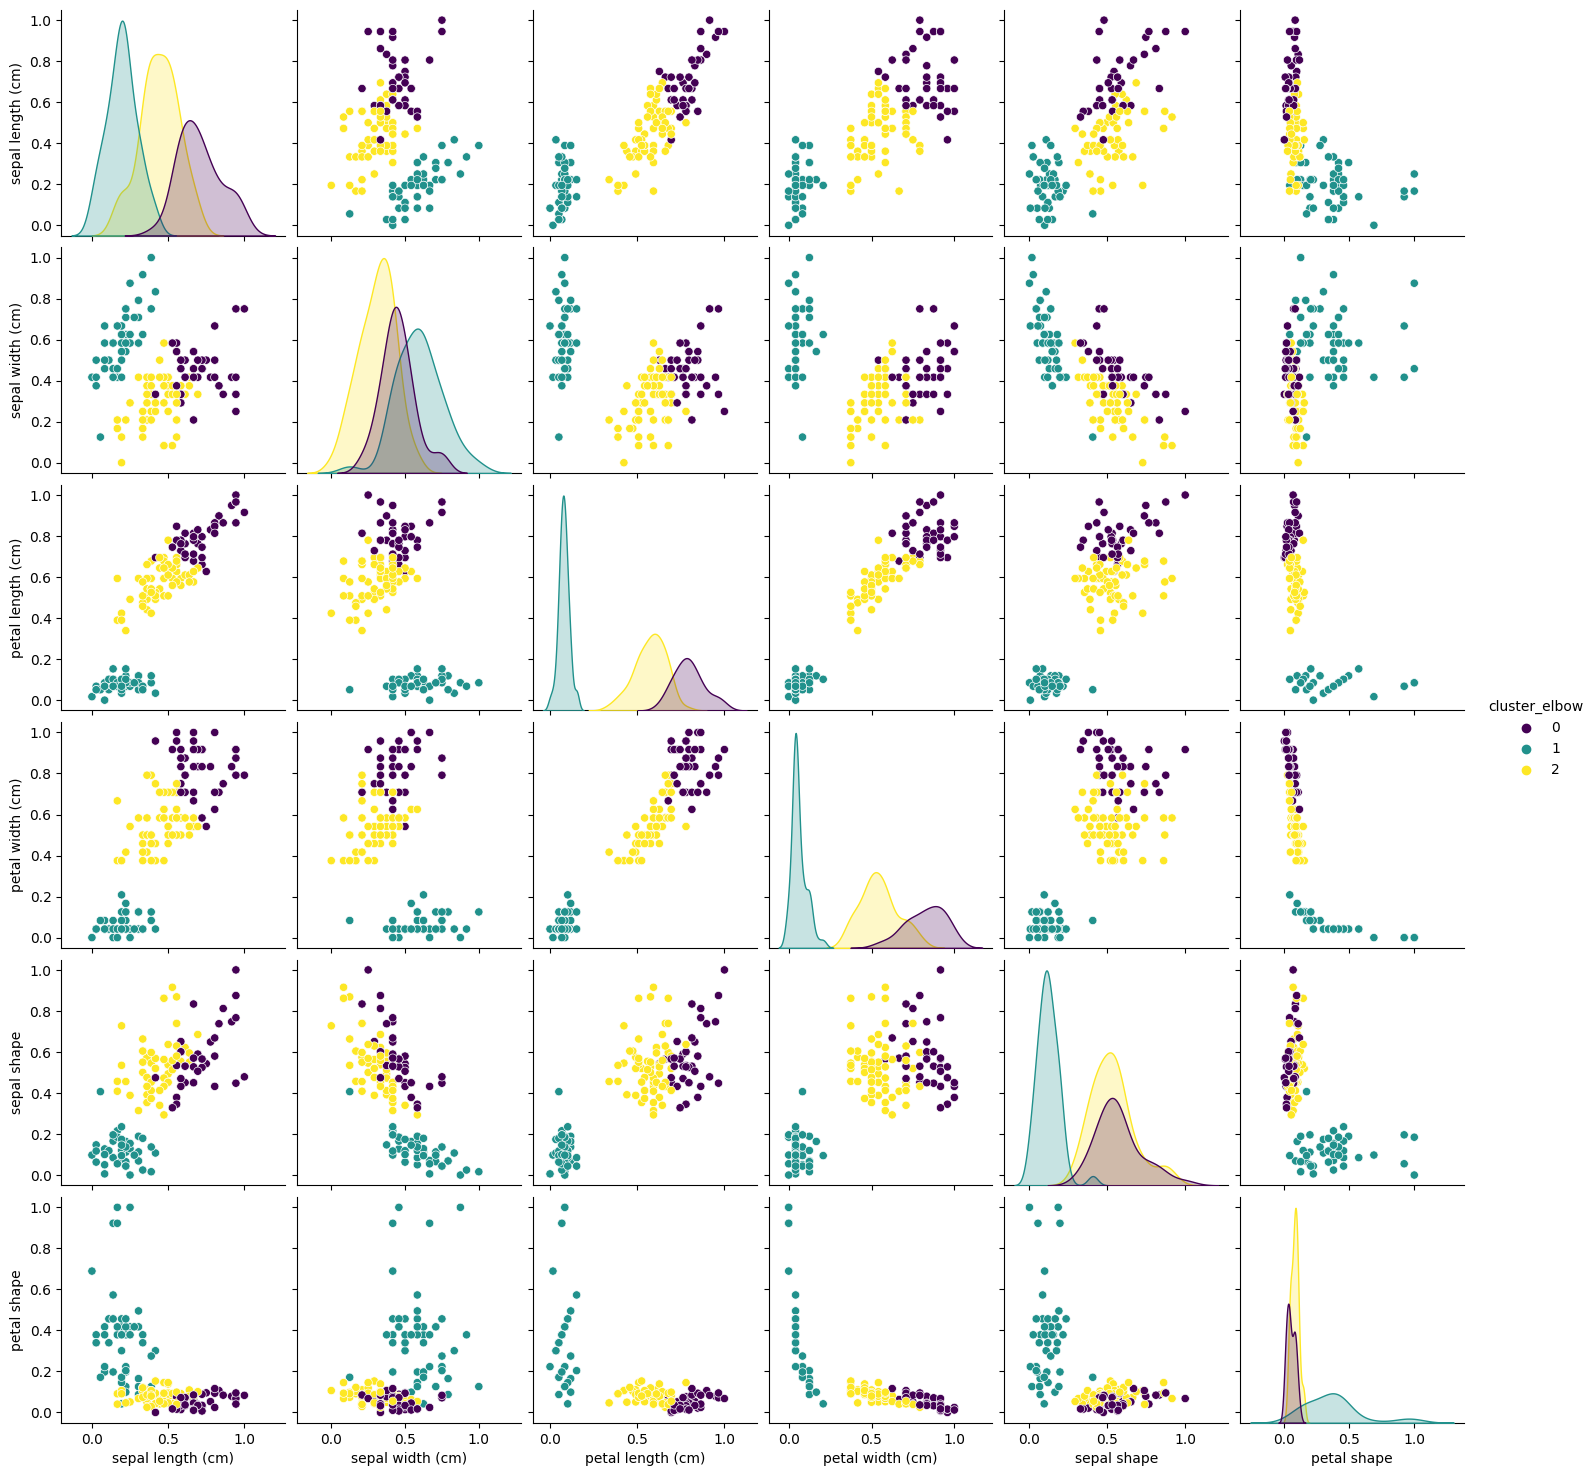

In [20]:
sns.pairplot(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','sepal shape','petal shape','cluster_elbow']], hue='cluster_elbow', palette='viridis', height=2.5)
plt.show()

### Interpretasi dan Hasil Evaluasi

Seperti yang diduga, label 1 yang saya rasa mengacu ke bunga versicolor mengalami bias, dimana dalam kasus ini lebih bias ke virginica. Kita dapat mengetahui bahwa bunga dengan ukuran yang relatif kecil kemungkinan besar masuk kategori 0 (atau setosa) karena hampir tidak pernah bias dengan kategori bunga lainnya.

Namun karena kita telah menambahkan fitur shape, sekarang clustering dapat mempelajari beberapa hal baru, misalnya untuk ukuran petal shape yang sama, petal width dari versicolor akan cenderung lebih besar dari petal width virginica. Informasi baru seperti ini diharapkan dapat meningkatkan akurasi prediksi.

Coba sekarang kita bandingkan dengan clustering dari annotator.

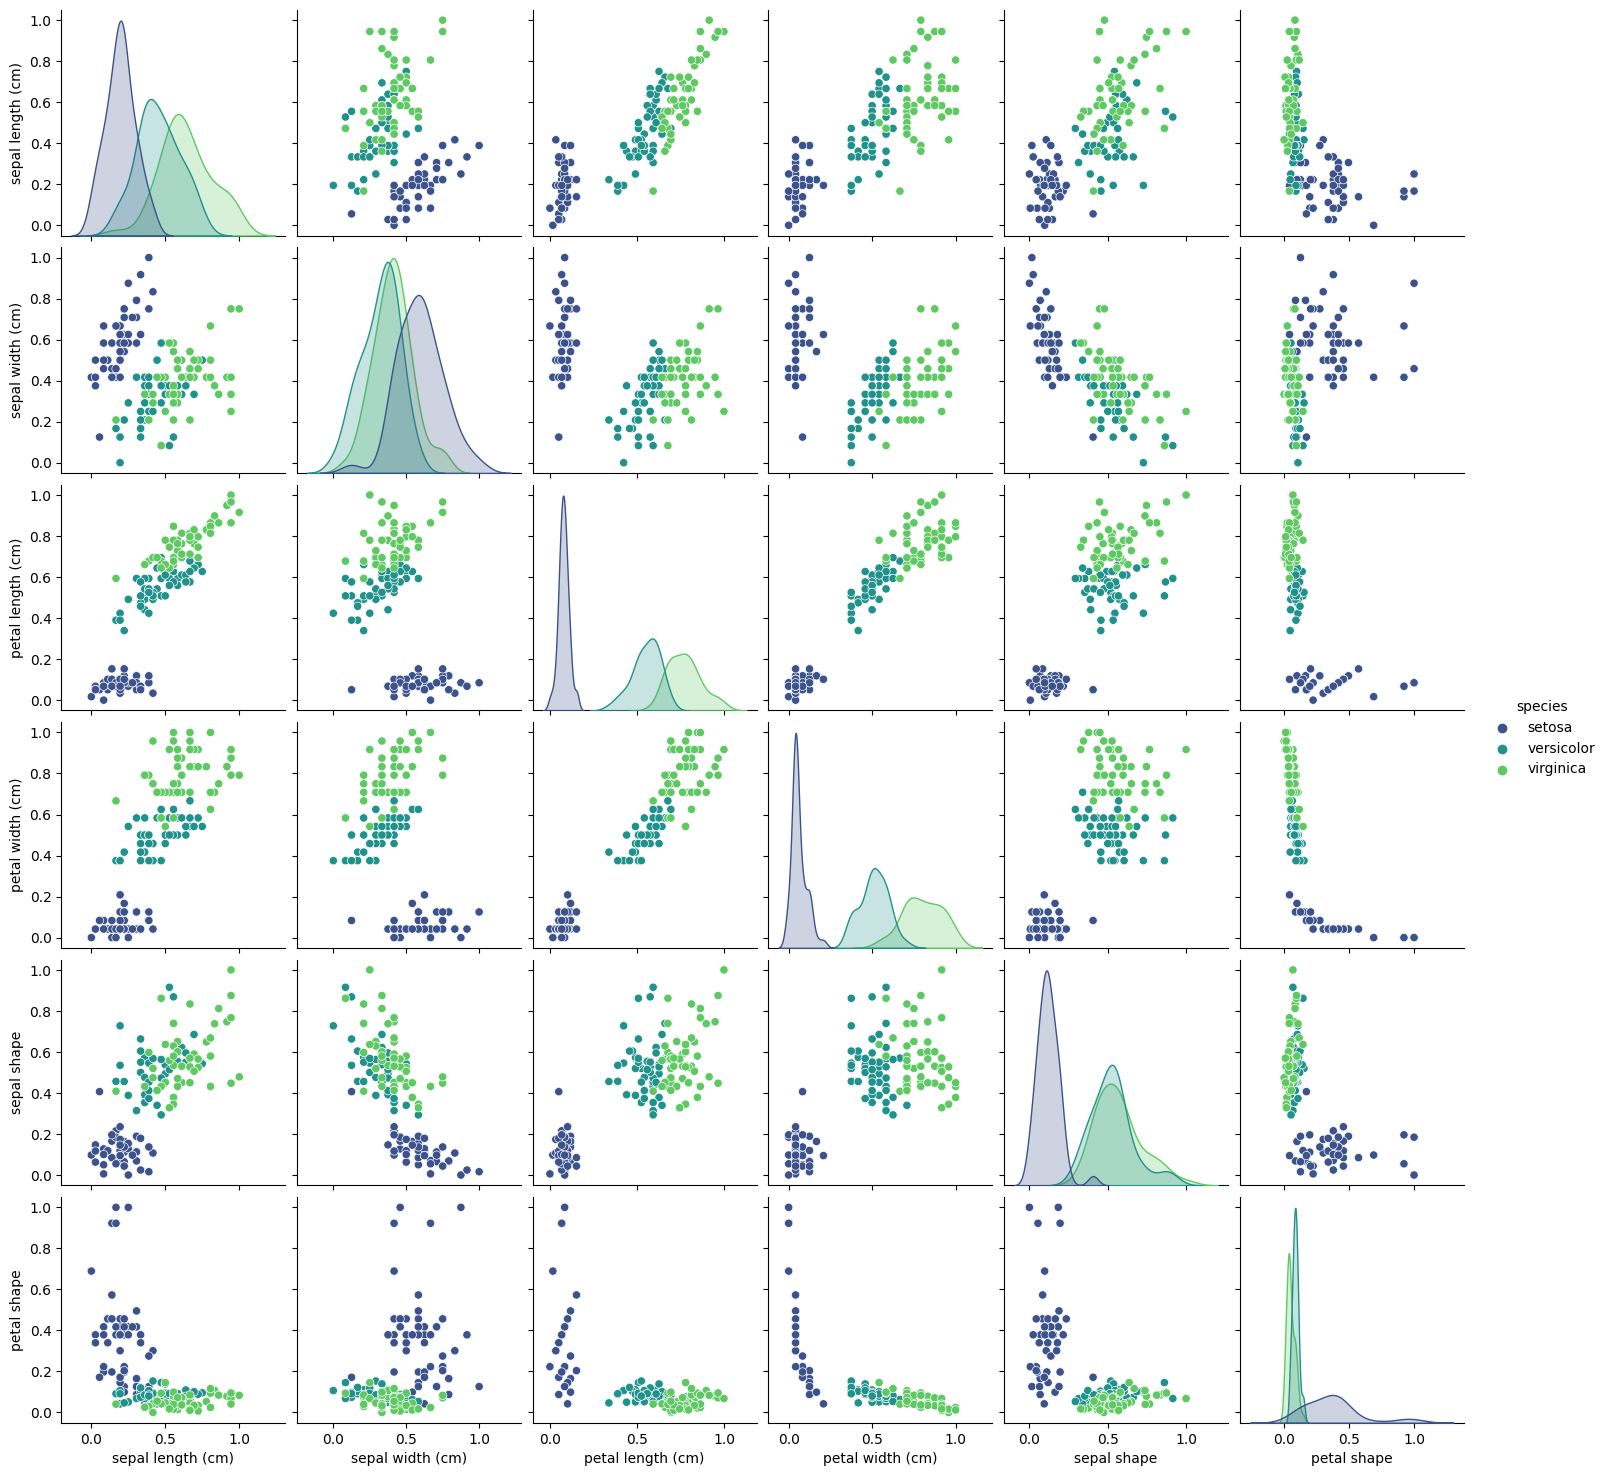

In [21]:
sns.pairplot(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','sepal shape','petal shape','species']], hue='species', palette='viridis', height=2.5)
plt.show()

Hasil clustering dengan elbow method dan annotator kita sangat mirip, bahkan jika dilihat dari letak bias maupun distribusi populasinya. Bahkan hasil clustering dengan elbow method jauh lebih rapi dibandingkan dengan annotator karena pada kurva annotator ada beberapa datapoint yang "masuk" kedalam cluster lainnya.

Dengan cluster baru yang lebih rapih ini, diharapkan akurasi saat membuat modeling klasifikasi nanti akan sangat tinggi.

### 2. Via Score Plot

Kita akan coba melihat kmeans optimal menggunakan via score plot.

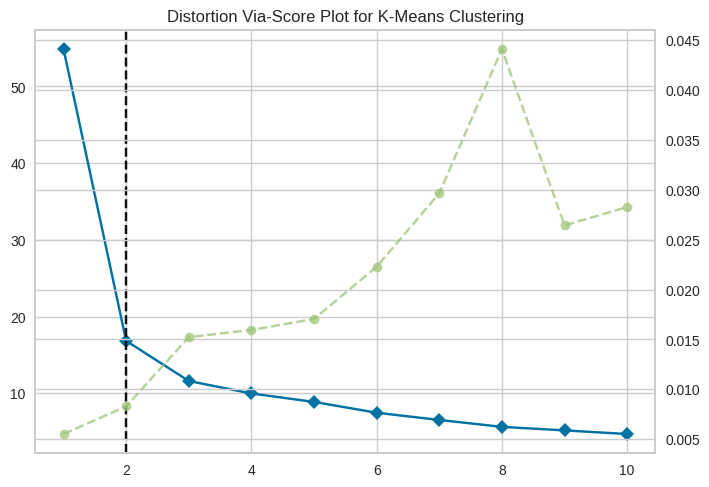

In [22]:
# Via Score Plot
from yellowbrick.cluster import KElbowVisualizer
k_means_via = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(k_means_via, k=(1,11), timings= True)
visualizer.fit(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','sepal shape','petal shape']].values)# Fit the data to the visualizer
plt.title('Distortion Via-Score Plot for K-Means Clustering')
plt.show()

### Interpretasi dan Hasil Evaluasi

KElbowvisualizer adalah semacam tools visualisasi yang dapat memberi saran terkait berapa nilai k yang dapat kompromi antara tidak terlalu sedikit sehingga dapat mencakup struktur data keseluruhan, namun juga tidak terlalu banyak sehingga mencegah overfitting. Prinsip perhitungannya sebenarnya sama saja dengan elbow method, namun memberikan kita metode yang objektif dalam menentukan nilai k yang optimum karena diberi dashed line.

Dari visualisasi diatas, nilai k yang diberi dashed line adalah 2 dan ini berbeda dengan hasil elbow method sebelumnya. Kalau kita coba plot dengan nilai k=2, maka bisa diharapkan hasilnya sangat berbeda dengan annotator dan sebaiknya tidak kita pakai. Berikut pembuktiannya.

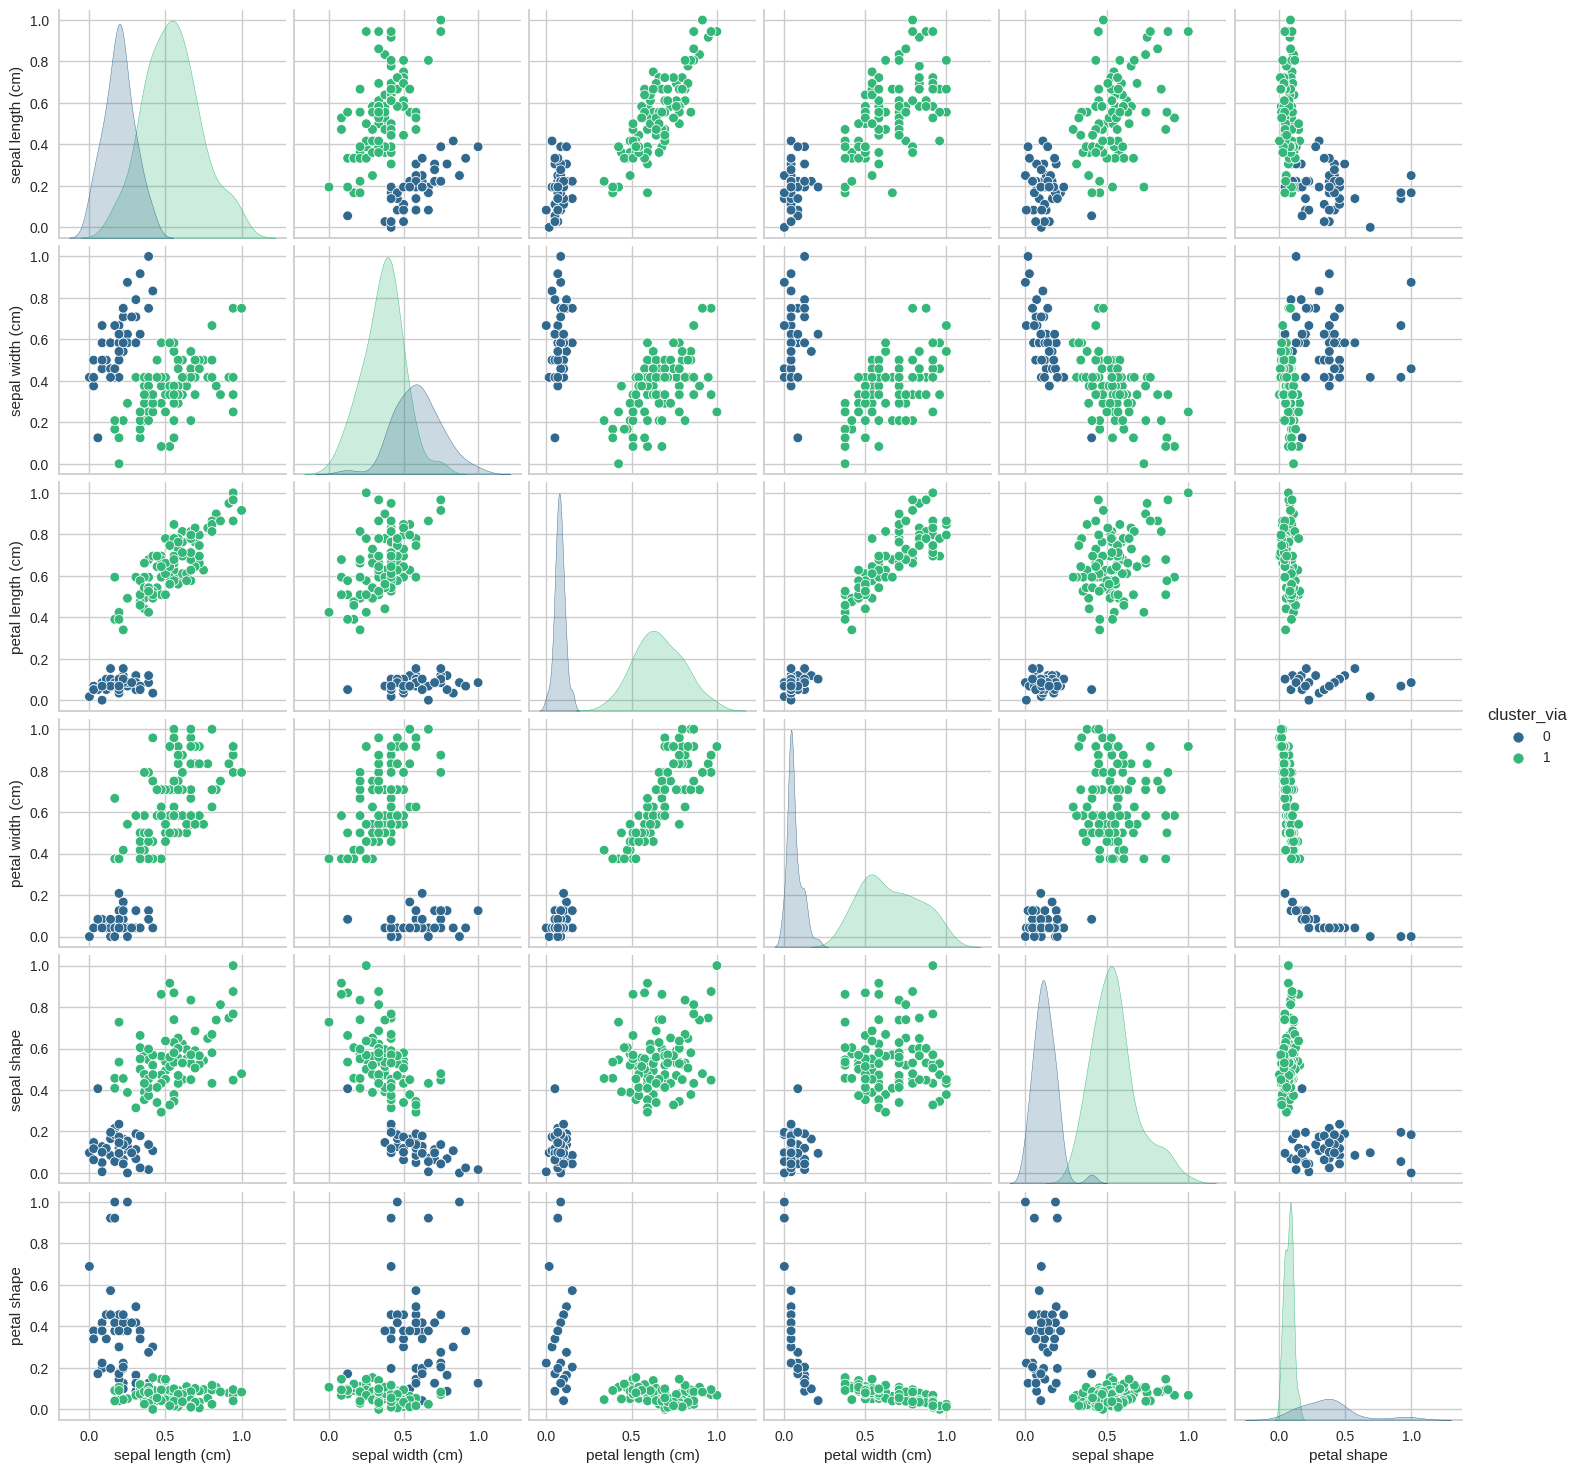

In [44]:
kmeans_via = KMeans(n_clusters=2, random_state=0)
kmeans_via.fit(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','sepal shape','petal shape']].values)

df['cluster_via'] = kmeans_via.labels_
sns.pairplot(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','sepal shape','petal shape','cluster_via']], hue='cluster_via', palette='viridis', height=2.5)
plt.show()

## 4. Assignment Multiclass (Point 25)
1. gunakan : Logistic Regression, Naive Bayes, KNN, SVM **(point 10)**
2. gunakan parameter model berbeda (parameter model dibahas di day 8) atau default (poin plus jika menggunakan parameter model berbeda) **(point 10)**
3. Evaluasi model **(point 5)**

### Referensi parameter model :
1. KNN : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
2. Logistic Regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
4. Naive Bayes : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Sebelumnya kita kembalikan dulu df yang belum di scale, agar dipisah terlebih dahulu menjadi data train dan test sebelum akhirnya dilakukan scaling.

In [23]:
df_unscaled=pd.read_csv('1700298484729-iris.csv')
df_unscaled=df_unscaled.drop_duplicates()
df_unscaled['sepal shape']=df_unscaled['sepal length (cm)']/df_unscaled['sepal width (cm)']
df_unscaled['petal shape']=df_unscaled['petal length (cm)']/df_unscaled['petal width (cm)']
print(df_unscaled.head())
print(df_unscaled.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  sepal shape  petal shape  
0  setosa     1.457143          7.0  
1  setosa     1.633333          7.0  
2  setosa     1.468750          6.5  
3  setosa     1.483871          7.5  
4  setosa     1.388889          7.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 

In [24]:
from sklearn.model_selection import train_test_split

#Insert pre-made cluster into unscaled df
df_unscaled['cluster_elbow']=df['cluster_elbow']
#Splitting
train, test = train_test_split(df_unscaled, test_size = 0.25, random_state = 42, stratify=df_unscaled.cluster_elbow)
train=train.drop('species',axis=1)
test=test.drop('species',axis=1)
print(train.head())
print(test.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
46                5.1               3.8                1.6               0.2   
41                4.5               2.3                1.3               0.3   
11                4.8               3.4                1.6               0.2   
34                4.9               3.1                1.5               0.2   

    sepal shape  petal shape  cluster_elbow  
0      1.457143     7.000000              1  
46     1.342105     8.000000              1  
41     1.956522     4.333333              1  
11     1.411765     8.000000              1  
34     1.580645     7.500000              1  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
148                6.2               3.4                5.4               2.3   
8                  4.4               2.9                1.4               0.2   


In [25]:
# separate into x_train, y_train, x_test, and y_test
x_train = train.copy()
y_train = x_train.pop('cluster_elbow')
x_test = test.copy()
y_test = x_test.pop('cluster_elbow')
print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
46                5.1               3.8                1.6               0.2   
41                4.5               2.3                1.3               0.3   
11                4.8               3.4                1.6               0.2   
34                4.9               3.1                1.5               0.2   

    sepal shape  petal shape  
0      1.457143     7.000000  
46     1.342105     8.000000  
41     1.956522     4.333333  
11     1.411765     8.000000  
34     1.580645     7.500000  
0     1
46    1
41    1
11    1
34    1
Name: cluster_elbow, dtype: int32
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
148                6.2               3.4                5.4               2.3   
8                  4.4               2.9                1.4               0.2   
1               

Terakhir, kita lakukan feature scaling.

In [26]:
x_train[x_train.columns]=scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns]=scaler.transform(x_test[x_test.columns])

print(x_train.head())
print(x_test.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            0.200000          0.590909           0.070175          0.041667   
46           0.200000          0.727273           0.105263          0.041667   
41           0.028571          0.045455           0.052632          0.083333   
11           0.114286          0.545455           0.105263          0.041667   
34           0.142857          0.409091           0.087719          0.041667   

    sepal shape  petal shape  
0      0.121848     0.374150  
46     0.047624     0.452381  
41     0.444051     0.165533  
11     0.092569     0.452381  
34     0.201532     0.413265  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
148           0.514286          0.545455           0.771930          0.916667   
8             0.000000          0.318182           0.070175          0.041667   
1             0.142857          0.363636           0.070175          0.041667   
25       

Kemudian jangan lupa kita mengimport modul yang akan digunakan untuk membuat dan menganalisa model.

In [27]:
#import model classification for multiclass
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #SVM
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.metrics import accuracy_score, classification_report #Evaluation matrix

### 1. Logistic Regression

In [28]:
!pip install scikit-optimize
from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score

# Initiate regression object, class weight refers to the count ratio of each class per total class
logistic_regression = LogisticRegression(random_state = 42)

# Apply hyperparameter tuning
param = {
    'tol': [0.0001, 0.001, 0.01],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.5,1,1.5],
    'fit_intercept':[False, True],
}

bayes_search = BayesSearchCV(estimator=logistic_regression, search_spaces=param,
                             cv=10,n_jobs=-1,n_iter=60, scoring='accuracy')
bayes_search.fit(x_train, y_train)
print("Parameter Terbaik:", bayes_search.best_params_)

logistic_regression = LogisticRegression(**bayes_search.best_params_,random_state = 42)

# Fit model to training data
logistic_regression.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, logistic_regression.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, logistic_regression.predict(x_test))*100} %" )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00
Parameter Terbaik: OrderedDict([('C', 1.0), ('fit_intercept', True), ('solver', 'sag'), ('tol', 0.01)])
Train Accuracy : 96.3963963963964 %
Test Accuracy : 97.36842105263158 %


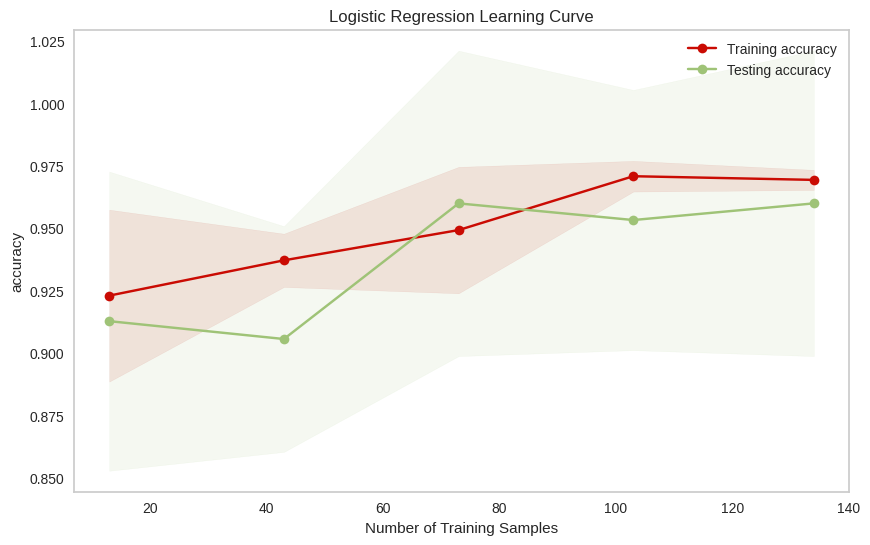

In [29]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Combine x_train and x_test to form new dataframe for learning curve plotting
x = pd.concat([x_train, x_test], axis=0)

# Combine y_train and y_test to form new dataframe for learning curve plotting
y = pd.concat([y_train, y_test], axis=0)

# Create learning curve function
def plot_learning_curve_classification(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()

# plot learning curve
plot_learning_curve_classification(logistic_regression, x, y, cv=10, scoring='accuracy', title="Logistic Regression Learning Curve")

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       1.00      0.97      0.99        37
           2       0.92      1.00      0.96        45

    accuracy                           0.96       111
   macro avg       0.97      0.96      0.96       111
weighted avg       0.97      0.96      0.96       111

------


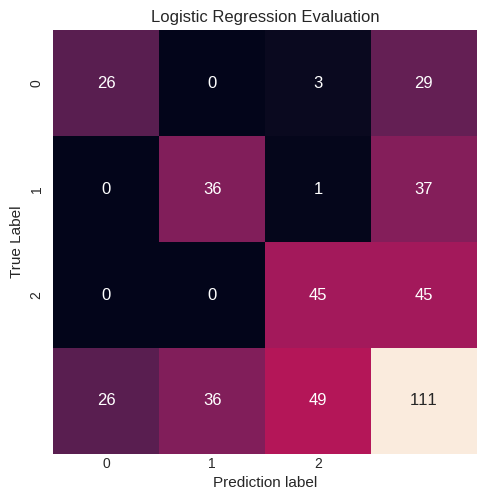

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        13
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

------


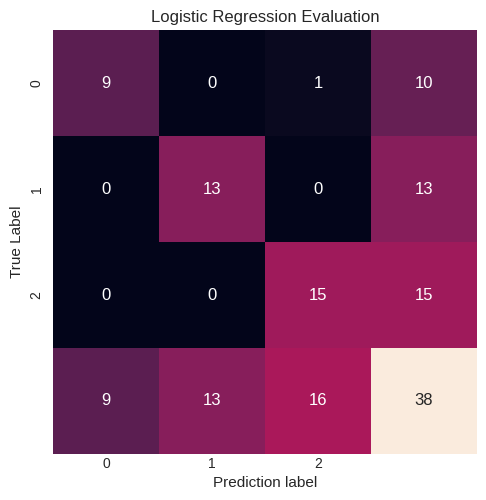

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Define function to calculate our classification report
def evaluate(model, name, x_test = x_test, y_test = y_test, x_train=x_train, y_train=y_train):

    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')
    matrix = pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5,2.5], [ '0', '1','2'],va='center')
    plt.xticks([0.5,1.5,2.5], [ '0', '1','2'],va='center')
    plt.show()

    y_pred_test = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred_test))
    print('------')
    matrix = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5,2.5], [ '0', '1','2'],va='center')
    plt.xticks([0.5,1.5,2.5], [ '0', '1','2'],va='center')
    plt.show()

# Get our classification report
evaluate(logistic_regression, 'Logistic Regression Evaluation')

### K-Nearest Neighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Find optimum n_neighbor
error = []
for i in range(1,31,1):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds = knn.predict(x_test)
    error.append(np.mean(preds!=y_test))
n_neighbor = error.index(np.min(error))+1
print(f'optimum n_neighbor: {n_neighbor}')

# Apply hyperparameter tuning to find optimum other parameters
param = {
    'p':[1.0,1.5,2.0],
    'leaf_size': [20,30,40],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}
knn = KNeighborsClassifier(n_neighbors=n_neighbor)
bayes_search = BayesSearchCV(estimator=knn, search_spaces=param,
                             cv=10,n_jobs=-1,n_iter=60,scoring='accuracy')
bayes_search.fit(x_train, y_train)
print("Parameter Terbaik:", bayes_search.best_params_)

# Fit the model
knn = KNeighborsClassifier(**bayes_search.best_params_,n_neighbors=n_neighbor)
knn.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, knn.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, knn.predict(x_test))*100} %" )

optimum n_neighbor: 7
Parameter Terbaik: OrderedDict([('algorithm', 'ball_tree'), ('leaf_size', 40), ('p', 1.5)])
Train Accuracy : 98.1981981981982 %
Test Accuracy : 97.36842105263158 %


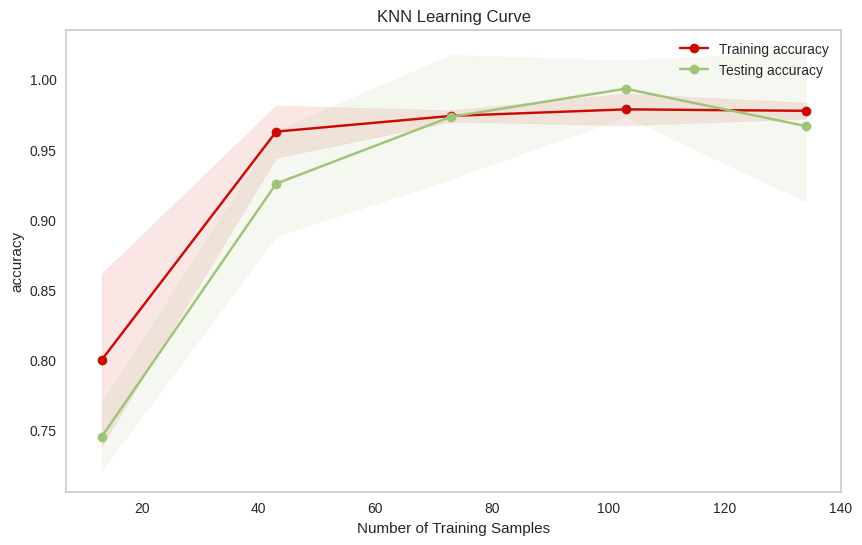

In [32]:
# plot learning curve
plot_learning_curve_classification(knn, x, y, cv=10, scoring='accuracy', title="KNN Learning Curve")

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       1.00      1.00      1.00        37
           2       0.96      1.00      0.98        45

    accuracy                           0.98       111
   macro avg       0.99      0.98      0.98       111
weighted avg       0.98      0.98      0.98       111

------


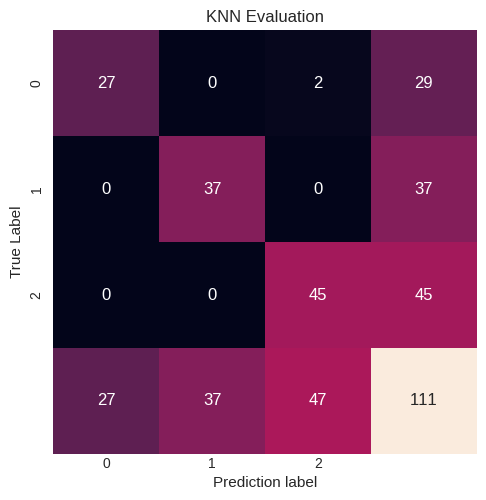

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        13
           2       0.94      1.00      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

------


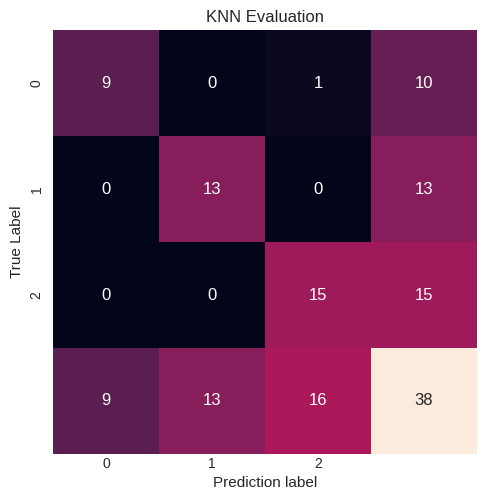

In [33]:
# Get our classification report
evaluate(knn, 'KNN Evaluation')

### Naive Bayes Model

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

naive_model = GaussianNB()


# Apply hyperparameter tuning to find optimum other parameters
param = {'priors':[[0.33,0.33,0.34],[0.3,0.3,0.4],[0.25,0.35,0.4]],
    'var_smoothing':[1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8]
}
naive_model = GaussianNB()
grid_search = GridSearchCV(estimator=naive_model, param_grid=param,
                             cv=10,n_jobs=-1,scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Parameter Terbaik:", grid_search.best_params_)

# Fit the model
naive_model = GaussianNB(**grid_search.best_params_)
naive_model.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, naive_model.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, naive_model.predict(x_test))*100} %" )

Parameter Terbaik: {'priors': [0.3, 0.3, 0.4], 'var_smoothing': 1e-14}
Train Accuracy : 99.09909909909909 %
Test Accuracy : 100.0 %


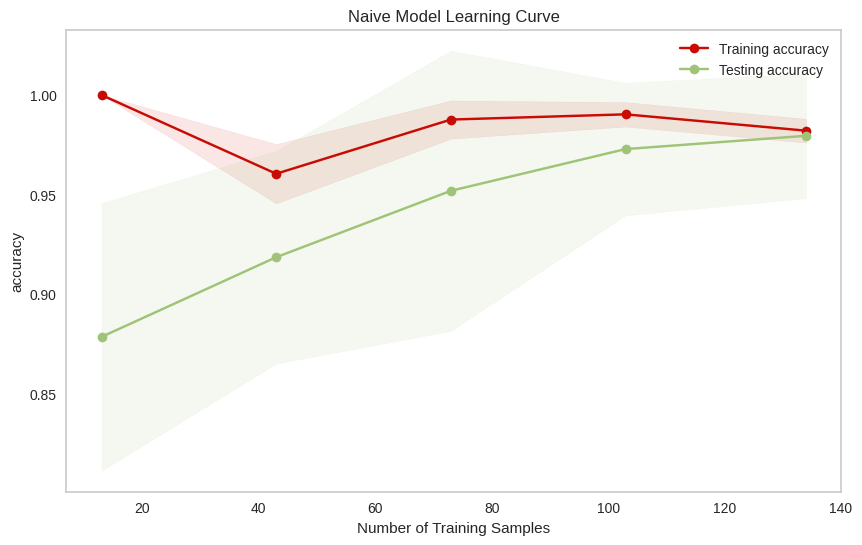

In [35]:
# plot learning curve
plot_learning_curve_classification(naive_model, x, y, cv=10, scoring='accuracy', title="Naive Model Learning Curve")

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       1.00      1.00      1.00        37
           2       0.98      1.00      0.99        45

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111

------


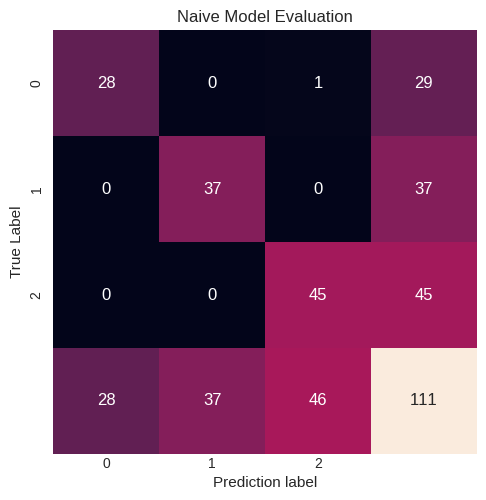

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

------


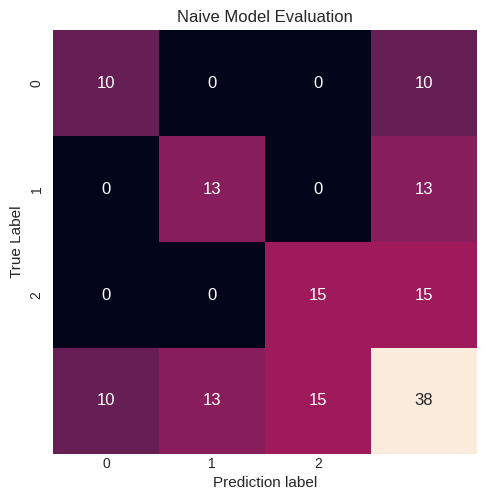

In [36]:
# Get our classification report
evaluate(naive_model, 'Naive Model Evaluation')

### 4. Support Vector Machine

In [37]:
from sklearn.svm import SVC

svc = SVC(random_state = 42)

# Apply hyperparameter tuning
param = {
    'tol': [0.0001, 0.001, 0.01],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.5,1,1.5],
    'degree':[2,3,4,5,6],
    'coef0':[0.0,0.5,1.0,2.0]
}

bayes_search = BayesSearchCV(estimator=svc, search_spaces=param,
                             cv=10,n_jobs=-1, n_iter=60, scoring='accuracy')
bayes_search.fit(x_train, y_train)
print("Parameter Terbaik:", bayes_search.best_params_)

# Fit the model
svc = SVC(**bayes_search.best_params_,random_state = 42)
svc.fit(x_train, y_train)

# Calculating accuracy
print(f"Train Accuracy : {accuracy_score(y_train, svc.predict(x_train))*100} %" )
print(f"Test Accuracy : {accuracy_score(y_test, svc.predict(x_test))*100} %" )

Parameter Terbaik: OrderedDict([('C', 0.5), ('coef0', 2.0), ('degree', 6), ('kernel', 'poly'), ('tol', 0.0001)])
Train Accuracy : 100.0 %
Test Accuracy : 92.10526315789474 %


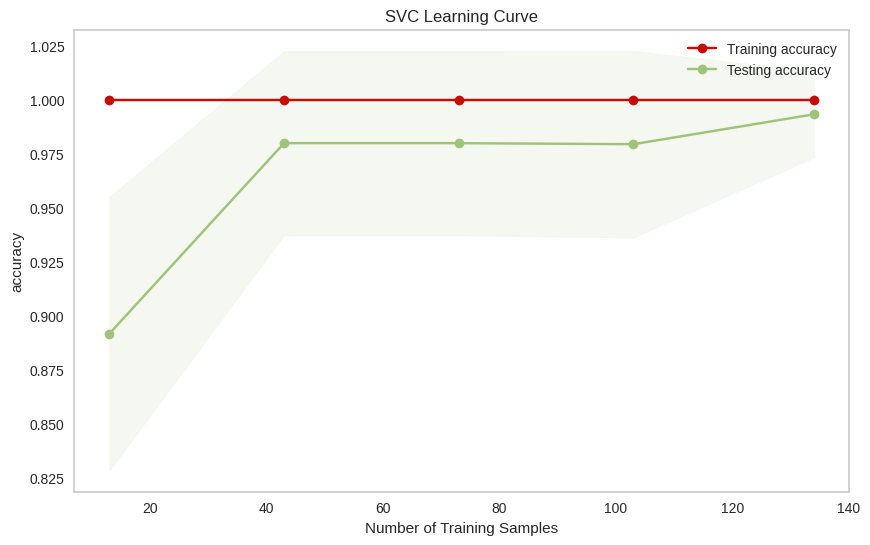

In [38]:
# plot learning curve
plot_learning_curve_classification(svc, x, y, cv=10, scoring='accuracy', title="SVC Learning Curve")

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        45

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

------


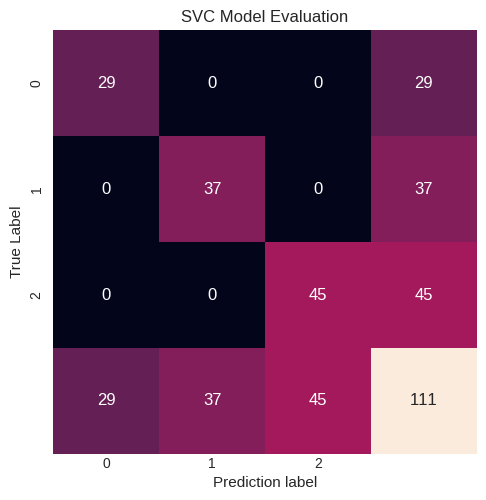

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      1.00      1.00        13
           2       0.93      0.87      0.90        15

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

------


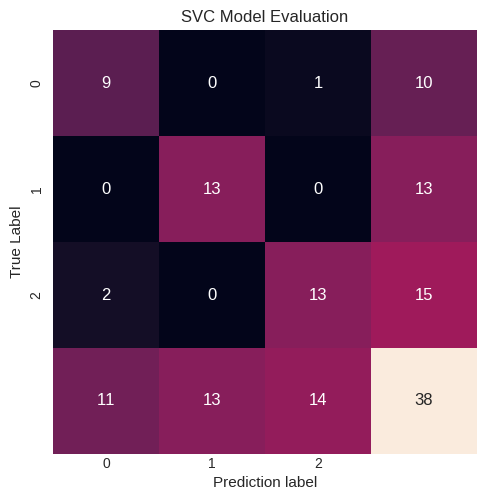

In [39]:
# Get our classification report
evaluate(svc, 'SVC Model Evaluation')

## 5. Bonus (Point 20) : Tulis Interpretasi dan Insight di tiap model + evaluasi model dan EDA dengan alasan kalian.

### Accuracy & Learning Curve

Logistic Regression

Logistic regression memiliki train accuracy 96.4% dan test accuracy 97.4 %. Learning curve juga menunjukkan bahwa accuracy training dan test terus meningkat dan converge.

KNN

Train accuracynya adalah 98.2% sedangkan test accuracynya adalah 97.4%. Nilai ini mengalami peningkatan dibanding jika kita tidak menambahkan fitur shape dimana train accuracynya sebesar 100% namun test accuracynya hanya 94.73%. Hal ini membuktikan bahwa penambahan fitur atau istilah lainnya adalah penambahan konteks dapat membuat model menjadi lebih general karena memiliki approach yang lebih luas dalam melakukan klasifikasi.

Naive Bayes

Train accuracynya adalah 99.1% sedangkan test accuracynya adalah 100%. Sejauh ini merupakan model yang paling memuaskan. Sama penjelasannya seperti pada KNN. Model sekarang memiliki lebih banyak approach untuk melakukan klasifikasi.

SVC

Train accuracynya adalah 100% sedangkan test accuracynya adalah 92.1%. Saya kurang paham apa sebabnya. Dari sisi learning curve juga tidak terdapat underfitting maupun overfitting. Namun sejauh ini kita bisa simpulkan bahwa penambahan fitur meningkatkan performa model secara keseluruhan.

### Classification Report

Kalau kita teliti clasification report lebih jauh, kali ini model masih sedikit kesulitan membedakan antara class 0 (virginica) dan class 2 (versicolor). Seluruh pola report consisten dimana akurasi class 1 saja yang selalu 100% sedangkan class 0 dan class 2 selalu tidak sempurna.

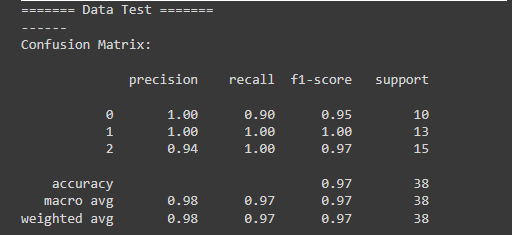

Namun setidaknya sekarang baik accuracy, precision, maupun recall sudah berada di kisaran angka 0.9 keatas, dibandingkan dengan tanpa penambahan fitur shape yang masih dikisaran 0.8.

### Conclusion

Ketika model yang kita buat sudah mengalami overfitting, mungkin dapat dipertimbangkan untuk segera membuat fitur baru. Inilah mengapa domain knowledge menjadi penting, dan mengapa para machine learnist diluar sana biasanya segera menghubungi customer setiap kali ada temuan baru.

## Link postingan linkedin :